In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [24]:
df= pd.read_csv('full_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6392 entries, 0 to 6391
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         6392 non-null   int64 
 1   Patient Age                6392 non-null   int64 
 2   Patient Sex                6392 non-null   object
 3   Left-Fundus                6392 non-null   object
 4   Right-Fundus               6392 non-null   object
 5   Left-Diagnostic Keywords   6392 non-null   object
 6   Right-Diagnostic Keywords  6392 non-null   object
 7   N                          6392 non-null   int64 
 8   D                          6392 non-null   int64 
 9   G                          6392 non-null   int64 
 10  C                          6392 non-null   int64 
 11  A                          6392 non-null   int64 
 12  H                          6392 non-null   int64 
 13  M                          6392 non-null   int64 
 14  O       

In [89]:
df.head(5)

,ID,Patient Age,Patient Sex,Left-Fundus,Right-Fundus,Left-Diagnostic Keywords,Right-Diagnostic Keywords,N,D,G,C,A,H,M,O,filepath,labels,target,filename
0,0,69,Female,0_left.jpg,0_right.jpg,cataract,normal fundus,0,0,0,1,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/0_right.jpg,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",0_right.jpg
1,1,57,Male,1_left.jpg,1_right.jpg,normal fundus,normal fundus,1,0,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/1_right.jpg,['N'],"[1, 0, 0, 0, 0, 0, 0, 0]",1_right.jpg
2,2,42,Male,2_left.jpg,2_right.jpg,laser spot，moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/2_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",2_right.jpg
3,4,53,Male,4_left.jpg,4_right.jpg,macular epiretinal membrane,mild nonproliferative retinopathy,0,1,0,0,0,0,0,1,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/4_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",4_right.jpg
4,5,50,Female,5_left.jpg,5_right.jpg,moderate non proliferative retinopathy,moderate non proliferative retinopathy,0,1,0,0,0,0,0,0,../input/ocular-disease-recognition-odir5k/ODIR-5K/Training Images/5_right.jpg,['D'],"[0, 1, 0, 0, 0, 0, 0, 0]",5_right.jpg


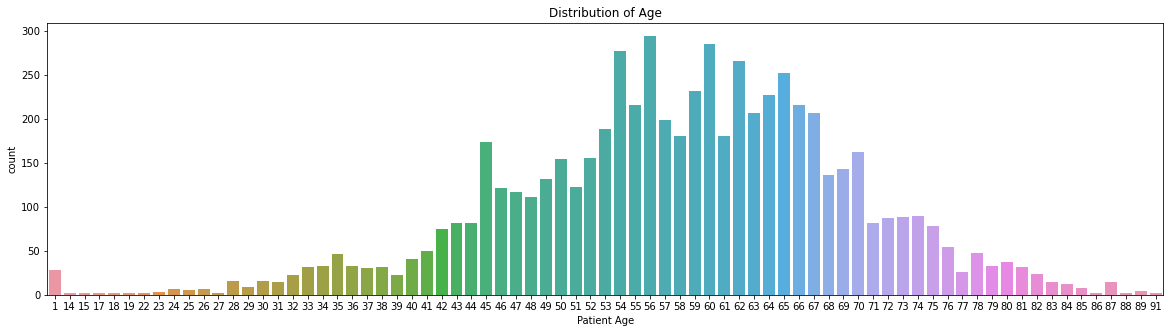

In [57]:
fig, ax1 = plt.subplots(1, 1, figsize=(20,5))
sns.countplot(ax=ax1, x="Patient Age", data=df)
ax1.set_title("Distribution of Age")
plt.show()

#### Majority of the data are from people in age group 30-82 and data from people in age group 55-70 are more dominant

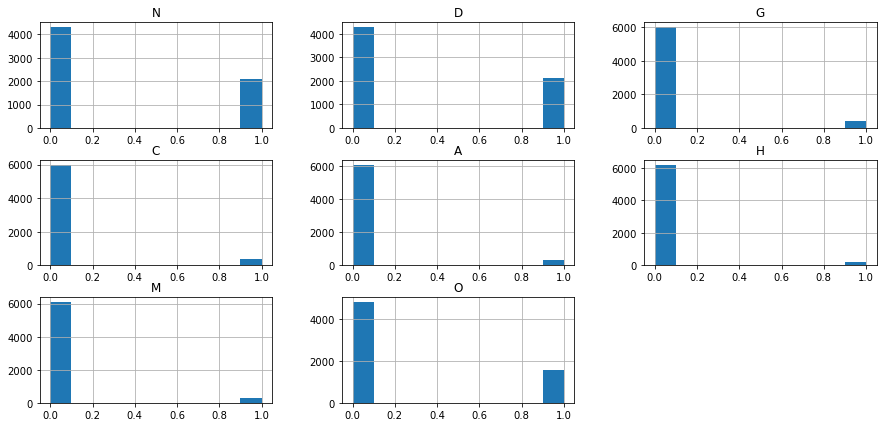

In [13]:
df[['N', 'D','G','C','A','H','M','O']].hist(figsize=(15,7))
plt.show()

### The dataset is heavily imbalanced
#### As the distribution of data for Cataract, Normal and Glaucoma are comparitively good we'll be making use of them . 

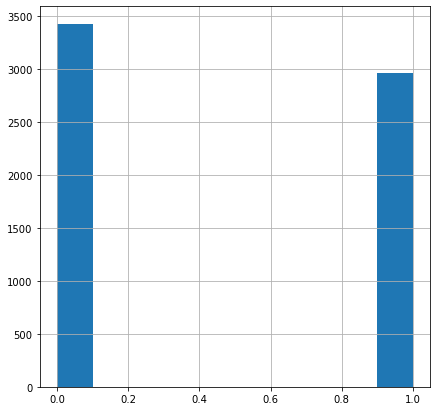

In [90]:
fig, ax1 = plt.subplots(1, 1, figsize=(10,5))

temp_dict = {'Male':0, 'Female':1}
df['Patient Sex'].map(temp_dict).hist(figsize=(7,7))
plt.show()

#### There are slightly less number of female compared to male

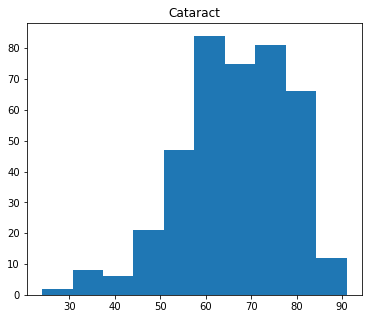

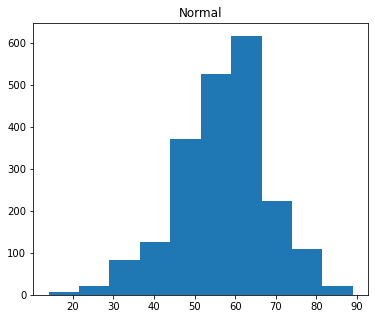

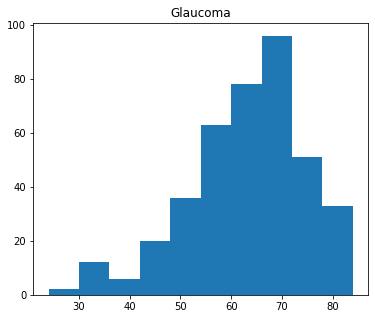

In [62]:
fig1 = df[df['C']==1]['Patient Age'].hist(figsize=[6,5])
ax1 = fig1
ax1.grid(False)
plt.title('Cataract')
plt.show()

fig2 = df[df['N']==1]['Patient Age'].hist(figsize=[6,5])
ax2 = fig2
ax2.grid(False)
plt.title('Normal')
plt.show()

fig3 = df[df['G']==1]['Patient Age'].hist(figsize=[6,5])
ax3 = fig3
ax3.grid(False)
plt.title('Glaucoma')
plt.show()

### People in the age group of 45 to 85 are affected by Cataract and people who're in group 60-80 are heavily affected by it in this sample
### From the Glaucoma histogram it's clear that it affects people who are in the age group 55-75

In [92]:
from create_dataframe import *

In [93]:
dataframe.head()

,filename,label
0,1_left.jpg,Normal
1,8_left.jpg,Normal
2,9_left.jpg,Normal
3,14_left.jpg,Normal
4,15_left.jpg,Normal


In [84]:
img_dir = "./preprocessed_images"
def plot_to_compare(ids:int ):
    print('                                     ids: {}'.format(ids))
    
    
    fig, ax = plt.subplots(1,3,figsize=(10, 10))
    img_cat,img_gla,img_norm = df_cataract['filename'][ids],df_glaucoma['filename'][ids],df_normal['filename'][ids]
    
    ax[0].imshow(cv2.imread(os.path.join(img_dir, img_cat)))
    ax[0].set_title('Cataract')
    
    ax[1].imshow(cv2.imread(os.path.join(img_dir, img_gla)))
    ax[1].set_title('Glaucoma')
    
    
    ax[2].imshow(cv2.imread(os.path.join(img_dir, img_norm)))
    ax[2].set_title('Normal')
    
    plt.show()

                                     ids: 352


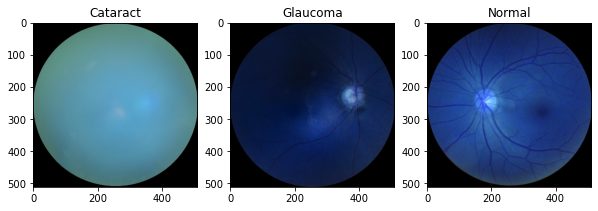

                                     ids: 12


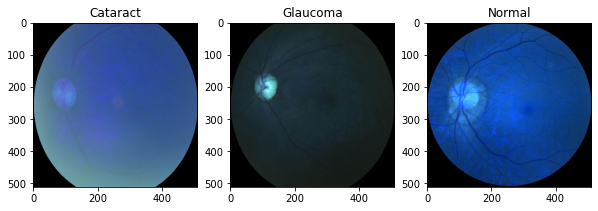

                                     ids: 182


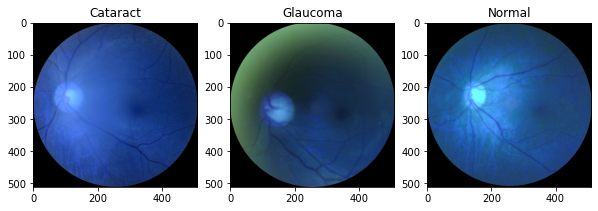

                                     ids: 246


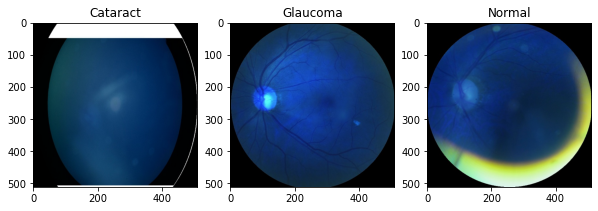

                                     ids: 20


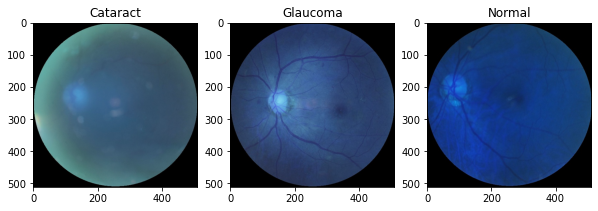

                                     ids: 137


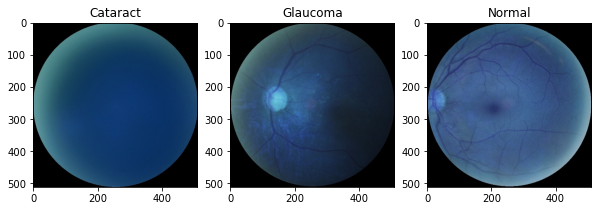

                                     ids: 298


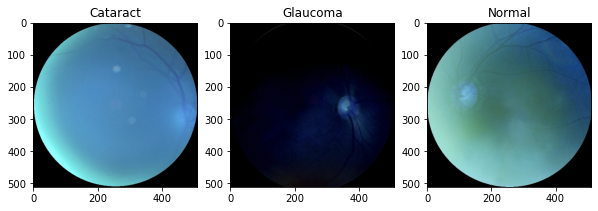

                                     ids: 151


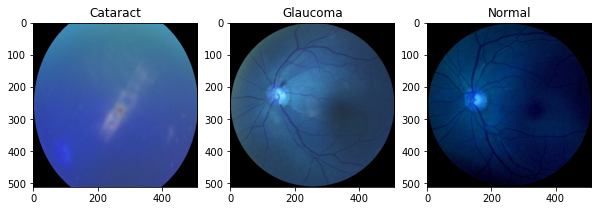

                                     ids: 83


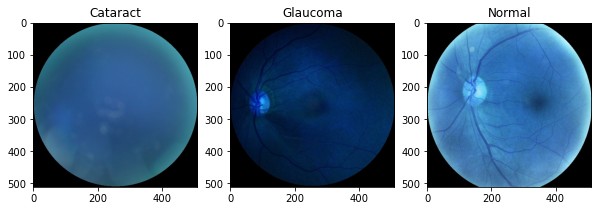

                                     ids: 223


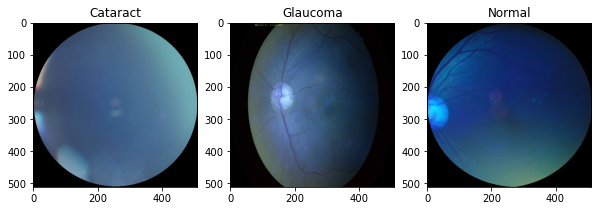

In [86]:
for i in np.random.randint(490,size=10):
    plot_to_compare(i)

In [87]:
img_dir = "./preprocessed_images"
def plot_to_compare_converted_img(ids:int):
    print('                                     ids: {}'.format(ids))
    
    
    fig, ax = plt.subplots(1,3,figsize=(10, 10))
    img_cat,img_gla,img_norm = df_cataract['filename'][ids],df_glaucoma['filename'][ids],df_normal['filename'][ids]
    
    
    ax[0].imshow(cv2.cvtColor(cv2.imread(os.path.join(img_dir, img_cat)), cv2.COLOR_BGR2RGB))
    ax[0].set_title('Cataract')
    
    ax[1].imshow(cv2.cvtColor(cv2.imread(os.path.join(img_dir, img_gla)), cv2.COLOR_BGR2RGB))
    ax[1].set_title('Glaucoma')
    
    
    ax[2].imshow(cv2.cvtColor(cv2.imread(os.path.join(img_dir, img_norm)), cv2.COLOR_BGR2RGB))
    ax[2].set_title('Normal')
    
    plt.show()

                                     ids: 400


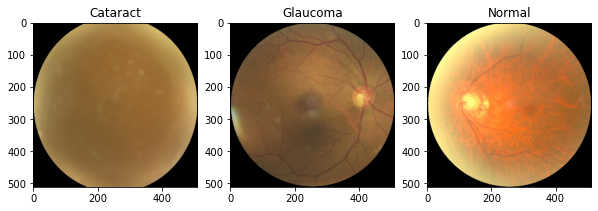

                                     ids: 60


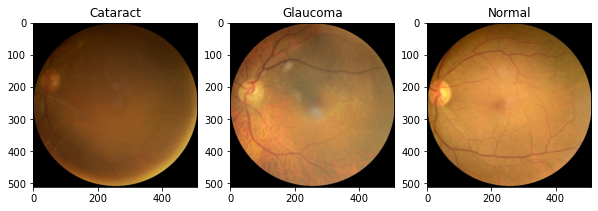

                                     ids: 464


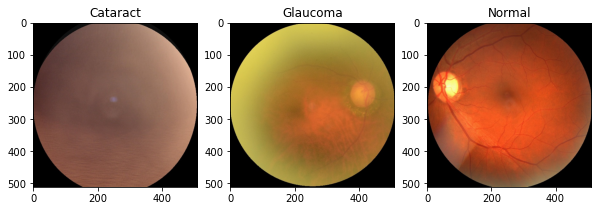

                                     ids: 258


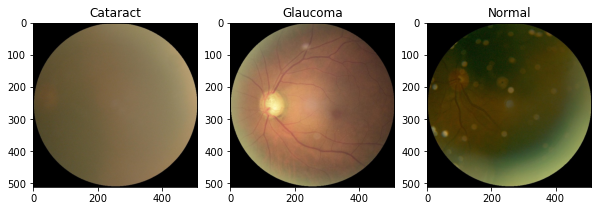

                                     ids: 118


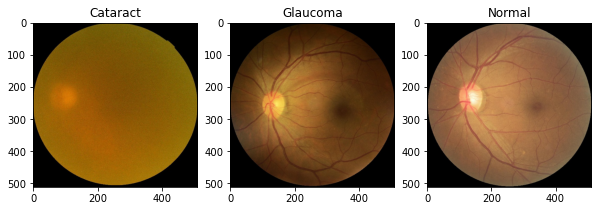

                                     ids: 169


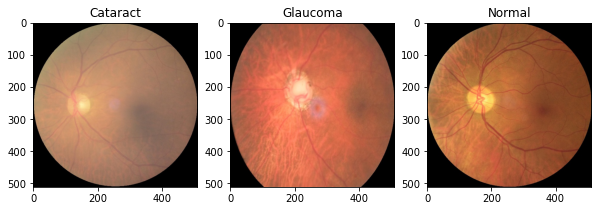

                                     ids: 189


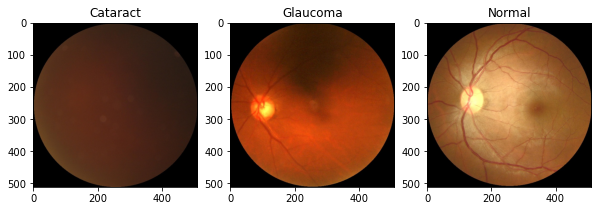

                                     ids: 244


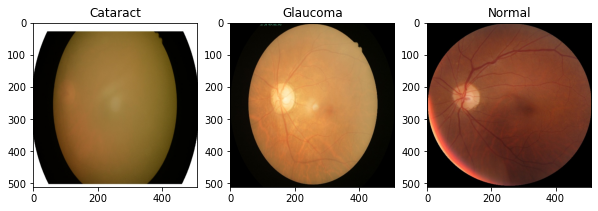

                                     ids: 101


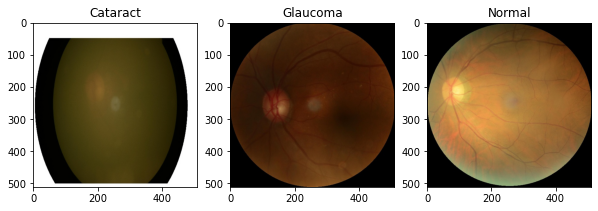

                                     ids: 258


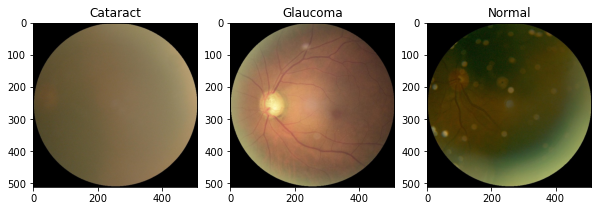

In [88]:
for j in np.random.randint(490,size=10):
    plot_to_compare_converted_img(j)